<a href="https://colab.research.google.com/github/pszachew/Music-Genre-Classification/blob/master/summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
import joblib
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pip install scikit-learn --upgrade

     |████████████████████████████████| 24.8 MB 75.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1


In [14]:
pip install matplotlib --upgrade

     |████████████████████████████████| 11.2 MB 29.2 MB/s 
     |████████████████████████████████| 890 kB 62.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [47]:
#GTZAN_L3 = {"Classifier":["LR", "SVM", "KNN", "DT", "RF", "XGB", "MLP"],
#         "Accuracy":[0.8718787878787879,  0.8798787878787879, 0.7987878787878788, 0.4484646464646465, 0.7737676767676768, 0.7557070707070708, 0.82],
#         "std":[0.01934406465729386, 0.02145069302854711, 0.03991519936685608, 0.03645674947366387, 0.03108607972416401, 0.027050356062081705, 0.0]}
GTZAN_L3 = {"Classifier":["LR", "SVM", "KNN", "RF", "XGB", "MLP"],
         "Accuracy":[0.8718787878787879,  0.8798787878787879, 0.7987878787878788,  0.7737676767676768, 0.7557070707070708, 0.82],
         "std":[0.01934406465729386, 0.02145069302854711, 0.03991519936685608,  0.03108607972416401, 0.027050356062081705, 0.0]}

In [48]:
GTZAN_L3 = pd.DataFrame(GTZAN_L3)
GTZAN_L3["Embedding"] = "OpenL3"

In [49]:
GTZAN_L3

,Classifier,Accuracy,std,Embedding
0,LR,0.871879,0.019344,OpenL3
1,SVM,0.879879,0.021451,OpenL3
2,KNN,0.798788,0.039915,OpenL3
3,RF,0.773768,0.031086,OpenL3
4,XGB,0.755707,0.027050,OpenL3
5,MLP,0.820000,0.000000,OpenL3


In [50]:
#GTZAN_MFCC = {"Classifier":["LR", "SVM", "KNN", "DT", "RF", "XGB", "MLP"],
#        "Accuracy":[0.6716565656565656, 0.6506262626262627,  0.6055959595959597, 0.5214545454545454, 0.6886969696969698, 0.6947171717171716, 0.74],
#        "std":[0.05296512011292598, 0.04081610082207415, 0.07931152326542065, 0.050855816280802914, 0.04053590728742019, 0.03480773638714091, 0]}
GTZAN_MFCC = {"Classifier":["LR", "SVM", "KNN",  "RF", "XGB", "MLP"],
         "Accuracy":[0.6716565656565656, 0.6506262626262627,  0.6055959595959597,  0.6886969696969698, 0.6947171717171716, 0.74],
         "std":[0.05296512011292598, 0.04081610082207415, 0.07931152326542065,  0.04053590728742019, 0.03480773638714091, 0]}

In [51]:
GTZAN_MFCC = pd.DataFrame(GTZAN_MFCC)

In [52]:
GTZAN_MFCC["Embedding"] = "MFCC"

In [53]:
GTZAN_MFCC

,Classifier,Accuracy,std,Embedding
0,LR,0.671657,0.052965,MFCC
1,SVM,0.650626,0.040816,MFCC
2,KNN,0.605596,0.079312,MFCC
3,RF,0.688697,0.040536,MFCC
4,XGB,0.694717,0.034808,MFCC
5,MLP,0.740000,0.000000,MFCC


In [86]:
GTZAN_concat = pd.concat([GTZAN_L3, GTZAN_MFCC], axis=0)

In [87]:
GTZAN_concat['Accuracy[%]'] = GTZAN_concat['Accuracy']*100
GTZAN_concat['std'] = GTZAN_concat['std']*100

## **GTZAN**

In [88]:
sns.set_theme(font_scale=1.5)

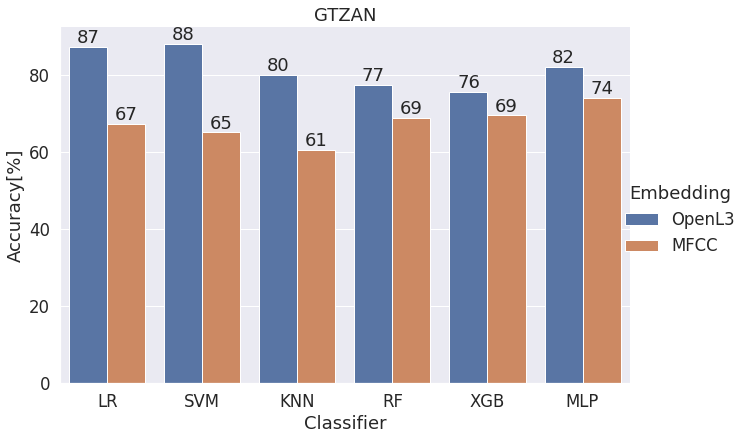

In [89]:
g = sns.catplot(x="Classifier", y="Accuracy[%]", data=GTZAN_concat, kind="bar", hue="Embedding")
g.fig.set_size_inches(12, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)
plt.title("GTZAN")
ax = g.facet_axis(0,0)
for c in ax.containers:
    labels = [f"{int(round((v.get_height()),0))}" for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

## **GTZAN MUSIC SPEECH**

In [90]:
#GTZAN_MS_L3 = {"Classifier":["LR", "SVM", "KNN", "DT", "RF", "XGB", "MLP"],
 #        "Accuracy":[1.0, 1.0, 1.0, 0.9070512820512819, 0.9923076923076923, 0.9846153846153847, 1.0],
  #       "std":[0.0, 0.0, 0.0, 0.057424592522977304, 0.02307692307692306, 0.030769230769230747,0]}
GTZAN_MS_L3 = {"Classifier":["LR", "SVM", "KNN", "RF", "XGB", "MLP"],
         "Accuracy":[1.0, 1.0, 1.0, 0.9923076923076923, 0.9846153846153847, 1.0],
         "std":[0.0, 0.0, 0.0,  0.02307692307692306, 0.030769230769230747,0]}

In [91]:
#GTZAN_MS_MFCC = {"Classifier":["LR", "SVM", "KNN", "DT", "RF", "XGB", "MLP"],
#        "Accuracy":[0.976923076923077,  0.9923076923076923, 0.9692307692307693, 0.953846153846154, 0.953846153846154, 0.953846153846154, 1.0],
#        "std":[0.06923076923076922,  0.02307692307692306, 0.07050116453778213, 0.07050116453778214, 0.07050116453778214, 0.07050116453778214, 0.0]}
GTZAN_MS_MFCC = {"Classifier":["LR", "SVM", "KNN", "RF", "XGB", "MLP"],
         "Accuracy":[0.976923076923077,  0.9923076923076923, 0.9692307692307693, 0.953846153846154, 0.953846153846154, 1.0],
         "std":[0.06923076923076922,  0.02307692307692306, 0.07050116453778213, 0.07050116453778214, 0.07050116453778214, 0.0]}

In [92]:
GTZAN_MS_L3 = pd.DataFrame(GTZAN_MS_L3)
GTZAN_MS_L3["Embedding"] = "OpenL3"

In [93]:
GTZAN_MS_MFCC = pd.DataFrame(GTZAN_MS_MFCC)
GTZAN_MS_MFCC["Embedding"] = "MFCC"

In [94]:
GTZAN_concat = pd.concat([GTZAN_MS_L3, GTZAN_MS_MFCC], axis=0)
GTZAN_concat['Accuracy[%]'] = GTZAN_concat['Accuracy']*100
GTZAN_concat['std'] = GTZAN_concat['std']*100

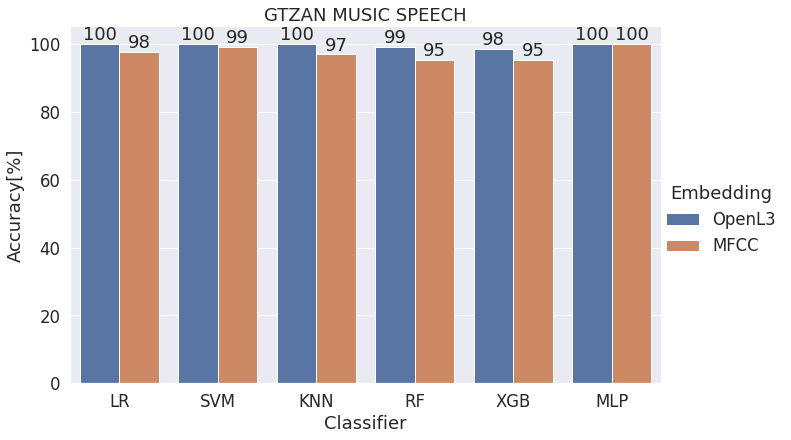

In [95]:
g = sns.catplot(x="Classifier", y="Accuracy[%]", data=GTZAN_concat, kind="bar", hue="Embedding")
g.fig.set_size_inches(13, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)
plt.title("GTZAN MUSIC SPEECH")
ax = g.facet_axis(0,0)
for c in ax.containers:
    labels = [f"{int(round((v.get_height()),0))}" for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

## **IRMAS**

In [103]:
#IRMAS_L3 = {"Classifier":["LR", "SVM", "KNN", "DT", "RF", "XGB", "MLP"],
 #        "Accuracy":[0.7971692951042106, 0.8135749716395667, 0.7903002869408546, 0.4311688947216229, 0.7045514602842716, 0.7279689481059679, 0.75],
  #       "std":[0.020242073462086542, 0.012786916806402805, 0.018851318524405497, 0.029891027440183838, 0.016188320158757125, 0.017350865615784295,0.0]}
IRMAS_L3 = {"Classifier":["LR", "SVM", "KNN", "RF", "XGB", "MLP"],
         "Accuracy":[0.7971692951042106, 0.8135749716395667, 0.7903002869408546,  0.7045514602842716, 0.7279689481059679, 0.75],
         "std":[0.020242073462086542, 0.012786916806402805, 0.018851318524405497,  0.016188320158757125, 0.017350865615784295,0.0]}

In [104]:
#IRMAS_MFCC = {"Classifier":["LR", "KNN", "SVM", "DT", "RF", "XGB", "MLP"],
 #        "Accuracy":[0.5345243232422093, 0.42968614453811416, 0.5245303289810264, 0.3658527036946415, 0.5618250772960829, 0.5612273950663969, 0.564179104477612],
  #       "std":[0.018171753840827427, 0.015328924847830725, 0.02519322800891604, 0.018932611005871073, 0.01998734616047639, 0.023249671776130538, 0.0]}
IRMAS_MFCC = {"Classifier":["LR", "KNN", "SVM", "RF", "XGB", "MLP"],
         "Accuracy":[0.5345243232422093, 0.42968614453811416, 0.5245303289810264,  0.5618250772960829, 0.5612273950663969, 0.564179104477612],
         "std":[0.018171753840827427, 0.015328924847830725, 0.02519322800891604,  0.01998734616047639, 0.023249671776130538, 0.0]}

In [105]:
IRMAS_L3 = pd.DataFrame(IRMAS_L3)
IRMAS_L3["Embedding"] = "OpenL3"
IRMAS_MFCC = pd.DataFrame(IRMAS_MFCC)
IRMAS_MFCC["Embedding"] = "MFCC"
IRMAS_concat = pd.concat([IRMAS_L3, IRMAS_MFCC], axis=0)
IRMAS_concat['Accuracy[%]'] = IRMAS_concat['Accuracy']*100
IRMAS_concat['std'] = IRMAS_concat['std']*100

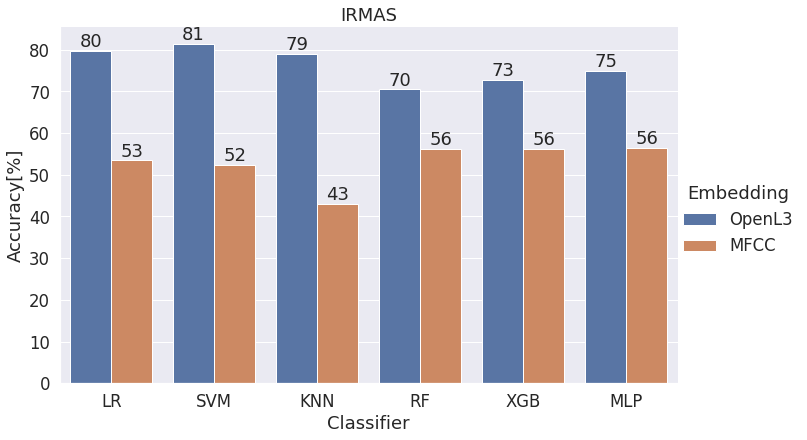

In [106]:
g = sns.catplot(x="Classifier", y="Accuracy[%]", data=IRMAS_concat, kind="bar", hue="Embedding")
g.fig.set_size_inches(13, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)
plt.title("IRMAS")
ax = g.facet_axis(0,0)
for c in ax.containers:
    labels = [f"{int(round((v.get_height()),0))}" for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

In [171]:
X = pd.read_csv('/content/gdrive/MyDrive/csv_data/IRMAS_embedded.csv',header=None)

In [172]:
y = pd.read_csv('/content/gdrive/MyDrive/csv_data/IRMAS_labels.csv', header=None)

In [173]:
scaler = StandardScaler()
scaler.fit(X)
X =pd.DataFrame(scaler.transform(X))

In [174]:
kf10 = KFold(n_splits=10, shuffle=True, random_state=42)

In [175]:
i=1
for x_train_idx, x_test_idx in kf10.split(X):
  if i == 10:
    X_train = X.iloc[x_train_idx]
    X_test = X.iloc[x_test_idx]
    y_train = y.iloc[x_train_idx]
    y_test = y.iloc[x_test_idx]
  i = i+1

In [176]:
svm10 = joblib.load("/content/gdrive/MyDrive/models/IRMAS/SVM/svm10.sav")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator SVC from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [177]:
y_pre_irmas = svm10.predict(X_test)

In [178]:
print(classification_report(y_test, y_pre_irmas))

              precision    recall  f1-score   support

         cel       0.72      0.71      0.72        41
         cla       0.78      0.79      0.78        48
         flu       0.74      0.74      0.74        35
         gac       0.91      0.91      0.91        54
         gel       0.78      0.89      0.83        70
         org       0.90      0.90      0.90        86
         pia       0.93      0.92      0.92        72
         sax       0.76      0.74      0.75        53
         tru       0.85      0.73      0.78        62
         vio       0.72      0.72      0.72        65
         voi       0.94      0.98      0.96        84

    accuracy                           0.84       670
   macro avg       0.82      0.82      0.82       670
weighted avg       0.84      0.84      0.84       670



In [179]:
labels = np.unique(np.array(y_train[0]))
labels.sort()
labels

array(['cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru',
       'vio', 'voi'], dtype=object)

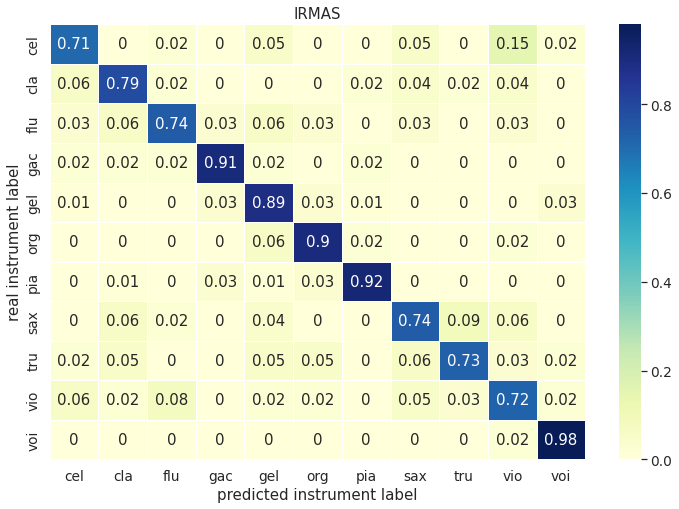

In [180]:
sns.set_theme(font_scale=1.25)
cm2 = confusion_matrix(y_test, y_pre_irmas, normalize='true')
cm2 = pd.DataFrame(cm2, index=labels, columns=[labels])
cm2 = np.round(cm2,2)
plt.figure(figsize=(12,8))
sns.heatmap(cm2, annot=True, linewidths=.5, cmap="YlGnBu")
plt.xlabel("predicted instrument label")
plt.ylabel("real instrument label")
plt.title("IRMAS")
plt.show()

## **TinySOL**

In [138]:
#TinySOL_L3 = {"Classifier":["LR", "KNN", "SVM", "DT", "RF", "XGB", "MLP"],
 #        "Accuracy":[0.9721908393353104, 0.9114214094054512, 0.9728804782751965, 0.6855481805771313, 0.9011380219366381, 0.9172833403944829, 0.94],
  #       "std":[0.011343204359590764, 0.014933262036240317, 0.008875521694845841, 0.03252162028237151, 0.014921345213295906, 0.02102122209407107, 0.0]}
TinySOL_L3 = {"Classifier":["LR", "SVM", "KNN", "RF", "XGB", "MLP"],
         "Accuracy":[0.9721908393353104, 0.9728804782751965, 0.9114214094054512, 0.9011380219366381, 0.9172833403944829, 0.94],
         "std":[0.011343204359590764, 0.008875521694845841, 0.014933262036240317,  0.014921345213295906, 0.02102122209407107, 0.0]}

In [139]:
#TinySOL_MFCC = {"Classifier":["LR", "KNN", "SVM", "RF", "XGB", "MLP"],
 #        "Accuracy":[0.8932413030174645, 0.7205632443628489, 0.896338793955656,  0.8942816457185897, 0.9083462787741844, 0.8890160183066361],
  #       "std":[0.016259888065823284, 0.02638106544668775, 0.018530832758104472,  0.02095305522673041, 0.02691318708839303, 0.0]}
TinySOL_MFCC = {"Classifier":["LR", "KNN", "SVM",  "RF", "XGB", "MLP"],
         "Accuracy":[0.8932413030174645, 0.7205632443628489, 0.896338793955656,  0.8942816457185897, 0.9083462787741844, 0.8890160183066361],
         "std":[0.016259888065823284, 0.02638106544668775, 0.018530832758104472,  0.02095305522673041, 0.02691318708839303, 0.0]}

In [140]:
TinySOL_L3 = pd.DataFrame(TinySOL_L3)
TinySOL_L3["Embedding"] = "OpenL3"
TinySOL_MFCC = pd.DataFrame(TinySOL_MFCC)
TinySOL_MFCC["Embedding"] = "MFCC"
TinySOL_concat = pd.concat([TinySOL_L3, TinySOL_MFCC], axis=0)
TinySOL_concat['Accuracy[%]'] = TinySOL_concat['Accuracy']*100
TinySOL_concat['std'] = TinySOL_concat['std']*100

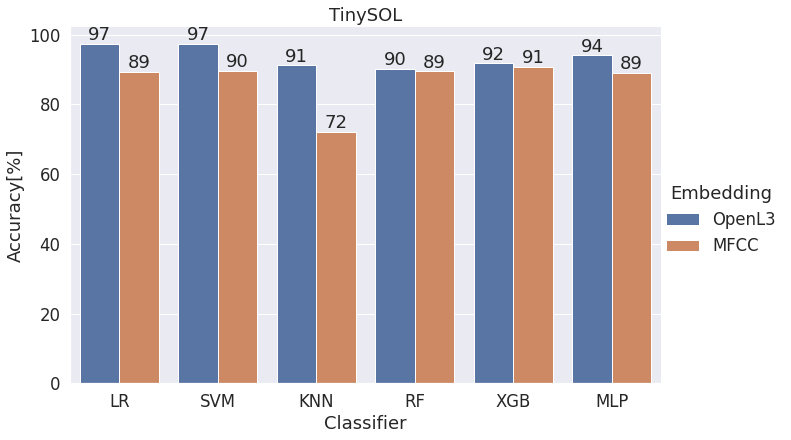

In [141]:
sns.set_theme(font_scale=1.5)
g = sns.catplot(x="Classifier", y="Accuracy[%]", data=TinySOL_concat, kind="bar", hue="Embedding")
g.fig.set_size_inches(13, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)
plt.title("TinySOL")
ax = g.facet_axis(0,0)
for c in ax.containers:
    labels = [f"{int(round((v.get_height()),0))}" for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

In [118]:
X = pd.read_csv('/content/gdrive/MyDrive/csv_data/TinySOL1s/features.csv',header=None)

In [119]:
y = pd.read_csv("/content/gdrive/MyDrive/csv_data/TinySOL1s/labels.csv", header=None)

In [120]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [121]:
i=1
for x_train_idx, x_test_idx in kf.split(X, y):
  if i == 10:
    X_train = X.iloc[x_train_idx]
    X_test = X.iloc[x_test_idx]
    y_train = y.iloc[x_train_idx]
    y_test = y.iloc[x_test_idx]
  i=i+1

In [122]:
model = joblib.load("/content/gdrive/MyDrive/models/TinySOL/LogisticRegression/log_reg101s.sav")

In [123]:
y_pre_sol = model.predict(X_test)
print(classification_report(y_test, y_pre_sol))

              precision    recall  f1-score   support

   Accordion       1.00      1.00      1.00        68
   Bass_Tuba       1.00      1.00      1.00        11
     Bassoon       1.00      1.00      1.00        13
 Clarinet_Bb       1.00      1.00      1.00        13
  Contrabass       1.00      1.00      1.00        31
       Flute       0.92      1.00      0.96        12
        Horn       1.00      1.00      1.00        14
        Oboe       1.00      1.00      1.00        10
    Sax_Alto       1.00      0.90      0.95        10
    Trombone       1.00      1.00      1.00        12
   Trumpet_C       1.00      1.00      1.00         9
       Viola       1.00      1.00      1.00        31
      Violin       1.00      1.00      1.00        28
 Violoncello       1.00      1.00      1.00        29

    accuracy                           1.00       291
   macro avg       0.99      0.99      0.99       291
weighted avg       1.00      1.00      1.00       291



In [124]:
labels = np.unique(np.array(y_train[0]))
labels.sort()
labels

array(['Accordion', 'Bass_Tuba', 'Bassoon', 'Clarinet_Bb', 'Contrabass',
       'Flute', 'Horn', 'Oboe', 'Sax_Alto', 'Trombone', 'Trumpet_C',
       'Viola', 'Violin', 'Violoncello'], dtype=object)

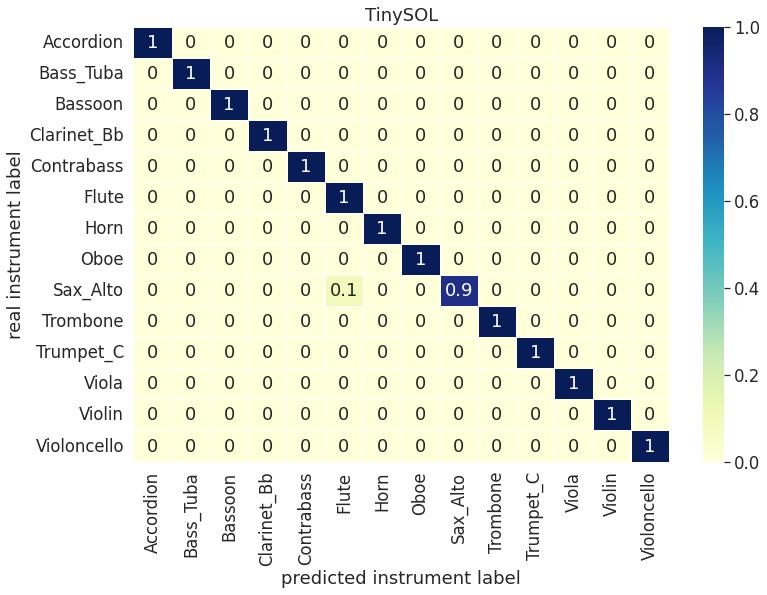

In [125]:
cm2 = confusion_matrix(y_test, y_pre_sol, normalize='true')
cm2 = pd.DataFrame(cm2, index=labels, columns=[labels])
plt.figure(figsize=(12,8))
sns.heatmap(cm2, annot=True, linewidths=.5, cmap="YlGnBu")
plt.xlabel("predicted instrument label")
plt.ylabel("real instrument label")
plt.title("TinySOL")
plt.show()

## **VocalSET**

In [133]:
#VocalSET_L3 = {"Classifier":["LR", "SVM", "KNN", "DT", "RF", "XGB", "MLP"],
 #        "Accuracy":[0.80, 0.79, 0.64, 0.27, 0.66, 0.65, 0.52]}
VocalSET_L3 = {"Classifier":["LR", "SVM", "KNN", "RF", "XGB", "MLP"],
         "Accuracy":[0.80, 0.79, 0.64, 0.66, 0.65, 0.52]}

In [134]:
#VocalSET_MFCC = {"Classifier":["LR", "SVM", "KNN", "DT", "RF", "XGB", "MLP"],
 #        "Accuracy":[0.65, 0.63, 0.52, 0.37, 0.68, 0.65, 0.74]}
VocalSET_MFCC = {"Classifier":["LR", "SVM", "KNN", "RF", "XGB", "MLP"],
         "Accuracy":[0.65, 0.63, 0.52, 0.68, 0.65, 0.74]}

In [135]:
VocalSET_L3 = pd.DataFrame(VocalSET_L3)
VocalSET_L3["Embedding"] = "OpenL3"
VocalSET_MFCC = pd.DataFrame(VocalSET_MFCC)
VocalSET_MFCC["Embedding"] = "MFCC"
VocalSET_concat = pd.concat([VocalSET_L3, VocalSET_MFCC], axis=0)
VocalSET_concat['Accuracy[%]'] = VocalSET_concat['Accuracy']*100

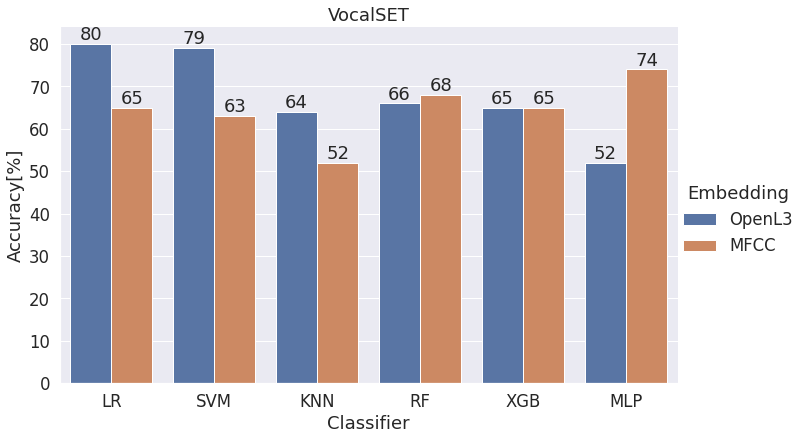

In [143]:
g = sns.catplot(x="Classifier", y="Accuracy[%]", data=VocalSET_concat, kind="bar", hue="Embedding")
g.fig.set_size_inches(13, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)
plt.title("VocalSET")
ax = g.facet_axis(0,0)
for c in ax.containers:
    labels = [f"{int(round((v.get_height()),0))}" for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

In [144]:
X_test = pd.read_csv('/content/gdrive/MyDrive/csv_data/VocalSET/features3s_test.csv',header=None)

In [145]:
y_test = pd.read_csv('/content/gdrive/MyDrive/csv_data/VocalSET/labels3s_test.csv', header=None)

In [146]:
model = joblib.load("/content/gdrive/MyDrive/models/VocalSET/LogisticRegression/log_reg.sav")

In [147]:
y_pre_vocal = model.predict(X_test)

In [148]:
print(classification_report(y_test,y_pre_vocal))

              precision    recall  f1-score   support

     female1       0.79      0.91      0.84        65
     female2       0.67      0.78      0.72        41
     female3       0.69      0.93      0.79        40
     female4       0.92      0.77      0.84        62
     female5       0.88      0.92      0.90        49
     female6       0.86      0.82      0.84        39
     female7       0.81      0.71      0.75        65
     female8       0.86      0.65      0.74        66
     female9       0.83      0.83      0.83        36
       male1       0.81      0.79      0.80        48
      male10       0.80      0.70      0.75        47
      male11       0.78      0.78      0.78        50
       male2       0.80      0.86      0.83        51
       male3       0.72      0.87      0.79        53
       male4       0.83      0.65      0.73        69
       male5       0.86      0.78      0.82        77
       male6       0.75      0.80      0.77        69
       male7       0.74    

In [149]:
labels = np.unique(np.array(y_test[0]))
labels.sort()
labels

array(['female1', 'female2', 'female3', 'female4', 'female5', 'female6',
       'female7', 'female8', 'female9', 'male1', 'male10', 'male11',
       'male2', 'male3', 'male4', 'male5', 'male6', 'male7', 'male8',
       'male9'], dtype=object)

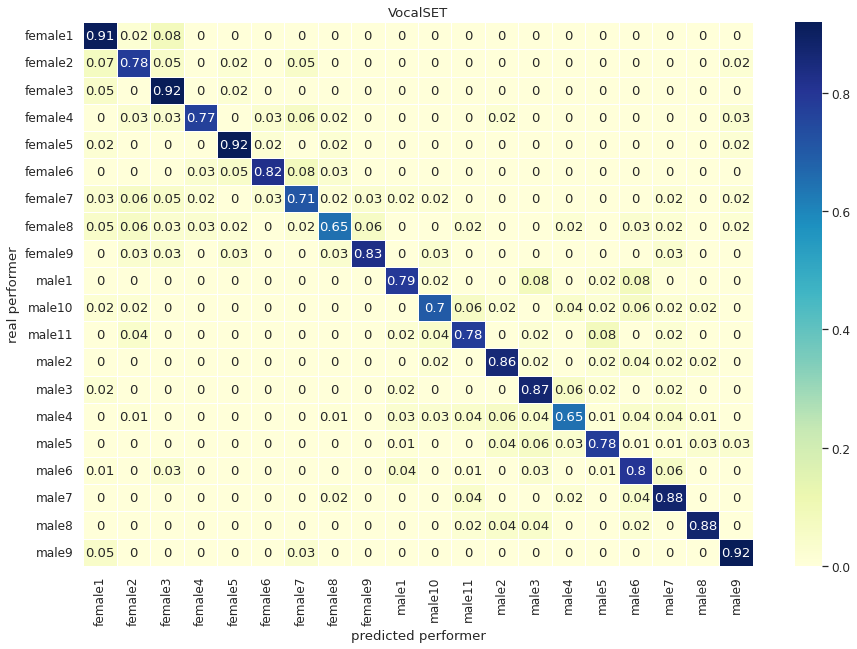

In [165]:
sns.set_theme(font_scale=1.1)
cm2 = np.round(confusion_matrix(y_test, y_pre_vocal, normalize='true'),2)
type(cm2)
cm2 = pd.DataFrame(cm2, index=labels, columns=[labels])
plt.figure(figsize=(15,10))
sns.heatmap(cm2, annot=True, linewidths=.5, cmap="YlGnBu")
plt.xlabel("predicted performer")
plt.ylabel("real performer")
plt.title("VocalSET")
plt.show()